<center><img src="./../data/besm.png" alt="In the name of Allah" width="150"></center>

<style>
    
@font-face {font-family: "B Lotus"; src: url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.eot"); src: url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.eot?#iefix") format("embedded-opentype"), url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.woff2") format("woff2"), url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.woff") format("woff"), url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.ttf") format("truetype"), url("//db.onlinewebfonts.com/t/1605a655ba0a3246ce5eca3eaff6c5c2.svg#B Lotus") format("svg"); }


</style>

<center style ='font-family: "B Lotus";'>تمرین اول - درس پردازش زبان‌های طبیعی</center>
<center style ='font-family: "B Lotus";'>ترم ۱۴۰۱۱ - دانشکده مهندسی کامپیوتر</center>
<hr>
<center style ='font-family: "B Lotus";'>محمدحسین موثقی‌نیا</center>
<center style ='font-family: "B Lotus";'>۴۰۰۲۰۰۹۱۹</center>
<hr>

<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">نصب و فراخوانی کتابخانه‌های مورد نیاز:</div>

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install tqdm
!pip install hazm
!pip install wordcloud_fa
!pip install nltk

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from tqdm import tqdm
from wordcloud_fa import WordCloudFa
from __future__ import unicode_literals
import hazm
import random
import codecs
from nltk import FreqDist
import nltk
import itertools
import copy

<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">زمانی که از <code>google-colab</code> استفاده می‌شود باید دو مورد زیر اضافه شود:</div>

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
# os.chdir('/content/drive/MyDrive/NLP/hw1/nlp/hw1/code/')

<div style="direction:rtl; font-family: 'B Lotus';  ul style="direction:rtl; font-family: 'B Lotus'; font-size:115%;"">تعریف الفباهای مورد نیاز، شامل موارد:</div>
<ul style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">
  <li>الفبای زبان فارسی</li>
  <li>علائم سجاوندی</li>
  <li>اعداد فارسی و انگلیسی</li>
  <li>لیست ایموجی&zwnj;ها &laquo;از این <a href="https://unicode.org/Public/emoji/15.0/" rel="noopener noreferrer" target="_blank">لینک</a> استفاده شده است&raquo;</li>
</ul> 

In [2]:
persian_alphabet = ["آ","ا","أ","ئ","ب","پ","ت","ث","ج","چ","ح","خ","د","ذ","ر","ز","ژ","س","ش","ص","ض","ط","ظ","ع","غ","ف","ق","ک","گ","ل","م","ن","و","ه","ی"]
decorative_signs = [" ", ",", ":", "؛", "|", "\\", "*", "\u200C", "٬", "!", "؟", "?", "(", ")", ".", "،", "%", "٪", "ـ", "-", "+", "=", "`", "~", "ء", "ٔ", "ٓ", "«", "»", "ة", "]", "[", "ة", "{", "}"]
english_alphabet = [chr(i) for i in range(ord('A'), ord('Z')+1)]
english_alphabet.extend([chr(i) for i in range(ord('a'), ord('z')+1)])
persian_numbers = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"] 
english_numbers = ["۰", "۱", "۲", "۳", "۴", "۵", "۶", "۷", "۸", "۹"]

In [3]:
emoji_df = pd.read_csv('./../data/emoji_df.csv')

emoji_df_single = pd.DataFrame(columns=["emoji","name","group","sub_group","codepoints"])
emoji_df_multiple = pd.DataFrame(columns=["emoji","name","group","sub_group","codepoints"])

j = 0
k = 0
for i, code in enumerate(emoji_df['codepoints']):
    if len(code.split()) > 1:
        emoji_df_multiple.loc[j] = emoji_df.loc[i]
        j += 1
    else:
        emoji_df_single.loc[k] = emoji_df.loc[i]
        k += 1

emoji_df

,emoji,name,group,sub_group,codepoints
0,😀,grinning face,Smileys & Emotion,face-smiling,1F600
1,😃,grinning face with big eyes,Smileys & Emotion,face-smiling,1F603
2,😄,grinning face with smiling eyes,Smileys & Emotion,face-smiling,1F604
3,😁,beaming face with smiling eyes,Smileys & Emotion,face-smiling,1F601
4,😆,grinning squinting face,Smileys & Emotion,face-smiling,1F606
...,...,...,...,...,...
4576,🇿🇲,flag: Zambia,Flags,country-flag,1F1FF 1F1F2
4577,🇿🇼,flag: Zimbabwe,Flags,country-flag,1F1FF 1F1FC
4578,🏴󠁧󠁢󠁥󠁮󠁧󠁿,flag: England,Flags,subdivision-flag,1F3F4 E0067 E0062 E0065 E006E E0067 E007F
4579,🏴󠁧󠁢󠁳󠁣󠁴󠁿,flag: Scotland,Flags,subdivision-flag,1F3F4 E0067 E0062 E0073 E0063 E0074 E007F


In [4]:
emoji_df_multiple

,emoji,name,group,sub_group,codepoints
0,☺️,smiling face,Smileys & Emotion,face-affection,263A FE0F
1,😶‍🌫️,face in clouds,Smileys & Emotion,face-neutral-skeptical,1F636 200D 1F32B FE0F
2,😶‍🌫,face in clouds,Smileys & Emotion,face-neutral-skeptical,1F636 200D 1F32B
3,😮‍💨,face exhaling,Smileys & Emotion,face-neutral-skeptical,1F62E 200D 1F4A8
4,😵‍💫,face with spiral eyes,Smileys & Emotion,face-unwell,1F635 200D 1F4AB
...,...,...,...,...,...
3256,🇿🇲,flag: Zambia,Flags,country-flag,1F1FF 1F1F2
3257,🇿🇼,flag: Zimbabwe,Flags,country-flag,1F1FF 1F1FC
3258,🏴󠁧󠁢󠁥󠁮󠁧󠁿,flag: England,Flags,subdivision-flag,1F3F4 E0067 E0062 E0065 E006E E0067 E007F
3259,🏴󠁧󠁢󠁳󠁣󠁴󠁿,flag: Scotland,Flags,subdivision-flag,1F3F4 E0067 E0062 E0073 E0063 E0074 E007F


In [5]:
emoji_group_counts = emoji_df_single['group'].value_counts()
for c in emoji_group_counts.keys():
    print(f"{c}:{list(emoji_df_single[emoji_df_single['group'] == c]['emoji'])}")

Objects:['👓', '🕶', '🥽', '🥼', '🦺', '👔', '👕', '👖', '🧣', '🧤', '🧥', '🧦', '👗', '👘', '🥻', '🩱', '🩲', '🩳', '👙', '👚', '👛', '👜', '👝', '🛍', '🎒', '🩴', '👞', '👟', '🥾', '🥿', '👠', '👡', '🩰', '👢', '👑', '👒', '🎩', '🎓', '🧢', '🪖', '⛑', '📿', '💄', '💍', '💎', '🔇', '🔈', '🔉', '🔊', '📢', '📣', '📯', '🔔', '🔕', '🎼', '🎵', '🎶', '🎙', '🎚', '🎛', '🎤', '🎧', '📻', '🎷', '🪗', '🎸', '🎹', '🎺', '🎻', '🪕', '🥁', '🪘', '📱', '📲', '☎', '📞', '📟', '📠', '🔋', '🔌', '💻', '🖥', '🖨', '⌨', '🖱', '🖲', '💽', '💾', '💿', '📀', '🧮', '🎥', '🎞', '📽', '🎬', '📺', '📷', '📸', '📹', '📼', '🔍', '🔎', '🕯', '💡', '🔦', '🏮', '🪔', '📔', '📕', '📖', '📗', '📘', '📙', '📚', '📓', '📒', '📃', '📜', '📄', '📰', '🗞', '📑', '🔖', '🏷', '💰', '🪙', '💴', '💵', '💶', '💷', '💸', '💳', '🧾', '💹', '✉', '📧', '📨', '📩', '📤', '📥', '📦', '📫', '📪', '📬', '📭', '📮', '🗳', '✏', '✒', '🖋', '🖊', '🖌', '🖍', '📝', '💼', '📁', '📂', '🗂', '📅', '📆', '🗒', '🗓', '📇', '📈', '📉', '📊', '📋', '📌', '📍', '📎', '🖇', '📏', '📐', '✂', '🗃', '🗄', '🗑', '🔒', '🔓', '🔏', '🔐', '🔑', '🗝', '🔨', '🪓', '⛏', '⚒', '🛠', '🗡', '⚔', '🔫', '🪃', '🏹', '🛡', '🪚', '🔧', '🪛', '🔩', '

In [6]:
emoji_group_counts = emoji_df_multiple['group'].value_counts()
for c in emoji_group_counts.keys():
    print(f"{c}:{list(emoji_df_multiple[emoji_df_multiple['group'] == c]['emoji'])}")
    print('=======')

People & Body:['👋🏻', '👋🏼', '👋🏽', '👋🏾', '👋🏿', '🤚🏻', '🤚🏼', '🤚🏽', '🤚🏾', '🤚🏿', '🖐️', '🖐🏻', '🖐🏼', '🖐🏽', '🖐🏾', '🖐🏿', '✋🏻', '✋🏼', '✋🏽', '✋🏾', '✋🏿', '🖖🏻', '🖖🏼', '🖖🏽', '🖖🏾', '🖖🏿', '👌🏻', '👌🏼', '👌🏽', '👌🏾', '👌🏿', '🤌🏻', '🤌🏼', '🤌🏽', '🤌🏾', '🤌🏿', '🤏🏻', '🤏🏼', '🤏🏽', '🤏🏾', '🤏🏿', '✌️', '✌🏻', '✌🏼', '✌🏽', '✌🏾', '✌🏿', '🤞🏻', '🤞🏼', '🤞🏽', '🤞🏾', '🤞🏿', '🤟🏻', '🤟🏼', '🤟🏽', '🤟🏾', '🤟🏿', '🤘🏻', '🤘🏼', '🤘🏽', '🤘🏾', '🤘🏿', '🤙🏻', '🤙🏼', '🤙🏽', '🤙🏾', '🤙🏿', '👈🏻', '👈🏼', '👈🏽', '👈🏾', '👈🏿', '👉🏻', '👉🏼', '👉🏽', '👉🏾', '👉🏿', '👆🏻', '👆🏼', '👆🏽', '👆🏾', '👆🏿', '🖕🏻', '🖕🏼', '🖕🏽', '🖕🏾', '🖕🏿', '👇🏻', '👇🏼', '👇🏽', '👇🏾', '👇🏿', '☝️', '☝🏻', '☝🏼', '☝🏽', '☝🏾', '☝🏿', '👍🏻', '👍🏼', '👍🏽', '👍🏾', '👍🏿', '👎🏻', '👎🏼', '👎🏽', '👎🏾', '👎🏿', '✊🏻', '✊🏼', '✊🏽', '✊🏾', '✊🏿', '👊🏻', '👊🏼', '👊🏽', '👊🏾', '👊🏿', '🤛🏻', '🤛🏼', '🤛🏽', '🤛🏾', '🤛🏿', '🤜🏻', '🤜🏼', '🤜🏽', '🤜🏾', '🤜🏿', '👏🏻', '👏🏼', '👏🏽', '👏🏾', '👏🏿', '🙌🏻', '🙌🏼', '🙌🏽', '🙌🏾', '🙌🏿', '👐🏻', '👐🏼', '👐🏽', '👐🏾', '👐🏿', '🤲🏻', '🤲🏼', '🤲🏽', '🤲🏾', '🤲🏿', '🙏🏻', '🙏🏼', '🙏🏽', '🙏🏾', '🙏🏿', '✍️', '✍🏻', '✍🏼', '✍🏽', '✍🏾', '✍🏿', '💅🏻', '💅🏼', '💅🏽', '💅🏾', '💅🏿', '

In [7]:
selected_group_df = ['People & Body', 'Smileys & Emotion', 'Symbols', 'Travel & Places']
emoji_selected_df = pd.DataFrame()
for group in selected_group_df:
    emoji_selected_df = pd.concat([emoji_selected_df, 
                                   emoji_df_single[emoji_df_single['group'] == group]], 
                                  ignore_index=True)

emoji_selected_df

,emoji,name,group,sub_group,codepoints
0,👋,waving hand,People & Body,hand-fingers-open,1F44B
1,🤚,raised back of hand,People & Body,hand-fingers-open,1F91A
2,🖐,hand with fingers splayed,People & Body,hand-fingers-open,1F590
3,✋,raised hand,People & Body,hand-fingers-open,270B
4,🖖,vulcan salute,People & Body,hand-fingers-open,1F596
...,...,...,...,...,...
710,⛄,snowman without snow,Travel & Places,sky & weather,26C4
711,☄,comet,Travel & Places,sky & weather,2604
712,🔥,fire,Travel & Places,sky & weather,1F525
713,💧,droplet,Travel & Places,sky & weather,1F4A7


In [8]:
emoji_alphabet_single = list(emoji_df_single['emoji'])
emoji_alphabet_multiple = list(emoji_df_multiple['emoji'])
emoji_alphabet = list(emoji_df['emoji'])
print('# Selected emoji list: \t\t\t\t', len(emoji_selected_df))
print('# Single Unicode Alphabet emoji list: \t\t', len(emoji_alphabet_single))
print('# Multiple Unicode Alphabet emoji list: \t', len(emoji_alphabet_multiple))
print('# All emoji list: \t\t\t\t', len(emoji_alphabet))

# Selected emoji list: 				 715
# Single Unicode Alphabet emoji list: 		 1320
# Multiple Unicode Alphabet emoji list: 	 3261
# All emoji list: 				 4581


In [9]:
emoji_alphabet = list(emoji_selected_df['emoji'])

<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">در این مرحله یک پیش&zwnj;پردازش اولیه انجام می&zwnj;شود:</div>
<ul style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">
  <li>حذف <code>n\</code> های اضافه متن که منجر به اضافه شدن خطوط شده است</li>
  <li>حذف مواردی که به دلیل اشتباه تایپی یا ... tab زده شده است و به دلیل این که در فایل به عنوان delimiter از tab استفاده شده است، این موارد را با یک tab جایگزین می کنیم.</li>
</ul> 

In [10]:
def check_file_and_extract_data(num):
    f = open(f'./../result/comments_{num}.txt', 'r')
    text = f.readlines()
    f.close()

    text = [x.replace('\n', '').replace('\t\t', '\t').split('\t') for x in text]

    i = 0
    while i < len(text):
        if len(text[i]) == 2:
            i += 1
            text[i-1].append(text[i])
            text[i] = []
        i += 1

    while [] in text:
        text.remove([])
    
    for i, x in enumerate(text):
        if len(x) != 3 and x != []:
            print(f'ERROR [{i}]')
    return text

In [11]:
data = []
for i in range(1,4):
    data.extend(check_file_and_extract_data(i))

comments_data = [c[2] for c in data]
print(f'Comments number: {len(data)}')

Comments number: 708934


<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">تابع <code>get_comments_with_emoji</code> لیستی از کامنت&zwnj;ها را دریافت می کند و در خروجی کامنت&zwnj;هایی را بر می&zwnj;گرداند که حتما دارای حداقل یک <strong>ایموجی</strong> باشند.</div>
<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">برای این منظور، بررسی می&zwnj;کند که آیا هرکدام از الفبای ایموجی موجود حداقل یکبار در متن وجود داشته است یا خیر. در صورت وجود آن را به لیست اضافه می کند.</div>

In [124]:
def get_comments_with_emoji(comments):
    comment_texts = []
    s1 = set(emoji_alphabet_multiple)
    
    for comment in tqdm(comments):
        if type(comment) == str:
            if s1.intersection(set(comment.split())) == set():
                for e in emoji_alphabet:
                    if e in comment:
                        comment_texts.append(comment)
                        break
    return comment_texts

In [125]:
get_comments_with_emoji(['Hello 👍', 'hi 👍🏻😒'])

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 5194.18it/s]


['Hello 👍', 'hi 👍🏻😒']

<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">به کمک تابع <code>get_comments_with_emoji</code> کامنت هایی که دارای ایموجی هستند را استخراج می‌کنیم و در نهایت در فایل <code>comments_with_emoji.txt</code> ذخیره می کنیم. </div>

In [126]:
comments_with_emoji = get_comments_with_emoji(comments_data)

f = open("./../result/comments_with_emoji.txt", "w")
for comment in comments_with_emoji:
    f.write(f"{comment}\n")
f.close()

len(comments_with_emoji)

100%|████████████████████████████████████████████████████████████████████████| 708934/708934 [00:07<00:00, 95775.27it/s]


87483

<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">با توجه به این که پروسه استخراج کامنت‌های دارای ایموجی، کمی طولانی است، خروجی در فایل <code>comments_with_emoji.txt</code> ذخیره شده و هر موقع نیاز باشد، بازخوانی می‌شود. </div>

In [12]:
comments_with_emoji = []

f = open("./../result/comments_with_emoji.txt", "r")
comments_with_emoji = f.readlines()
f.close()

len(comments_with_emoji)

87483

<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">این تابع به منظور استخراج مقادیری از دیکشنری ورودی است که بزرگتر از مقدار <code>value</code> باشند.</div>

In [13]:
def get_gt_value(my_dict, value):
    '''
    Get values from dictionary that grater than "value"
    '''
    return {x:y for x,y in my_dict.items() if y>value}

<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">تابع نمایش چند مورد اول لیست</div>

In [14]:
def head_list(lst, until=5, sep=' '):
    '''
    Print top "until" item of list, "sep" is the seperator of printing results
    '''
    result = ''
    num = 0
    for i in lst:
        if num == until:
            result += f'{i}'
        else:
            result += f'{i}{sep}'
        num += 1
        if num > until:
            break
    print(result)

<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">یک دیکشنری از ایموجی ها ساخته و تعداد هرکدام را در آن ذخیره می‌کنیم و در نهایت یک مرتب سازی براساس تعداد انجام می دهیم.</div>
<div style="direction:rtl; font-family: 'B Lotus';  font-size:115%;">در زمان شمارش، برای هر خط درصورتی که چندبار از یک ایموجی استفاده شده باشد، آن ایموجی فقط یکبار در شمارش به حساب خواهد آمد.</div>

In [130]:
emoji_dict = {}

for emoji in emoji_alphabet:
    emoji_dict[emoji] = 0

for comment in tqdm(comments_with_emoji):
    tmp_lst = []
    for s in comment:
        if s in emoji_alphabet:
            tmp_lst.append(s)
    for e in list(dict.fromkeys(tmp_lst)):
        emoji_dict[e] += 1

emoji_dict = {k: v for k, v in sorted(emoji_dict.items(), key=lambda item: item[1], reverse=True)}
emoji_dict_nonzero = get_gt_value(emoji_dict, 0)

100%|███████████████████████████████████████████████████████████████████████████| 87483/87483 [00:14<00:00, 6234.26it/s]


In [131]:
top_num_to_show = 20

print(f'Top {top_num_to_show} emojis in texts:\n #\tEmoji\tNumber')

i = 0
for k in emoji_dict.keys():
    print(f'{i:2d}\t{k}\t{emoji_dict[k]}')
    i += 1
    if i >= 20:
        break

print('---------------------')
print(f"The percentage of emojis in the text compared to the total emojis: \
[{int(len(emoji_dict_nonzero)/len(emoji_dict)*10000)/100}%]")

Top 20 emojis in texts:
 #	Emoji	Number
 0	😍	17301
 1	❤	14088
 2	👌	12406
 3	👍	9779
 4	😂	6890
 5	😘	4831
 6	👏	4325
 7	🤩	3412
 8	🤣	3017
 9	🥰	2943
10	😭	2334
11	😊	2118
12	🙏	2049
13	💜	1868
14	💙	1761
15	😁	1593
16	💖	1546
17	🥺	1432
18	😅	1119
19	😐	1116
---------------------
The percentage of emojis in the text compared to the total emojis: [62.93%]


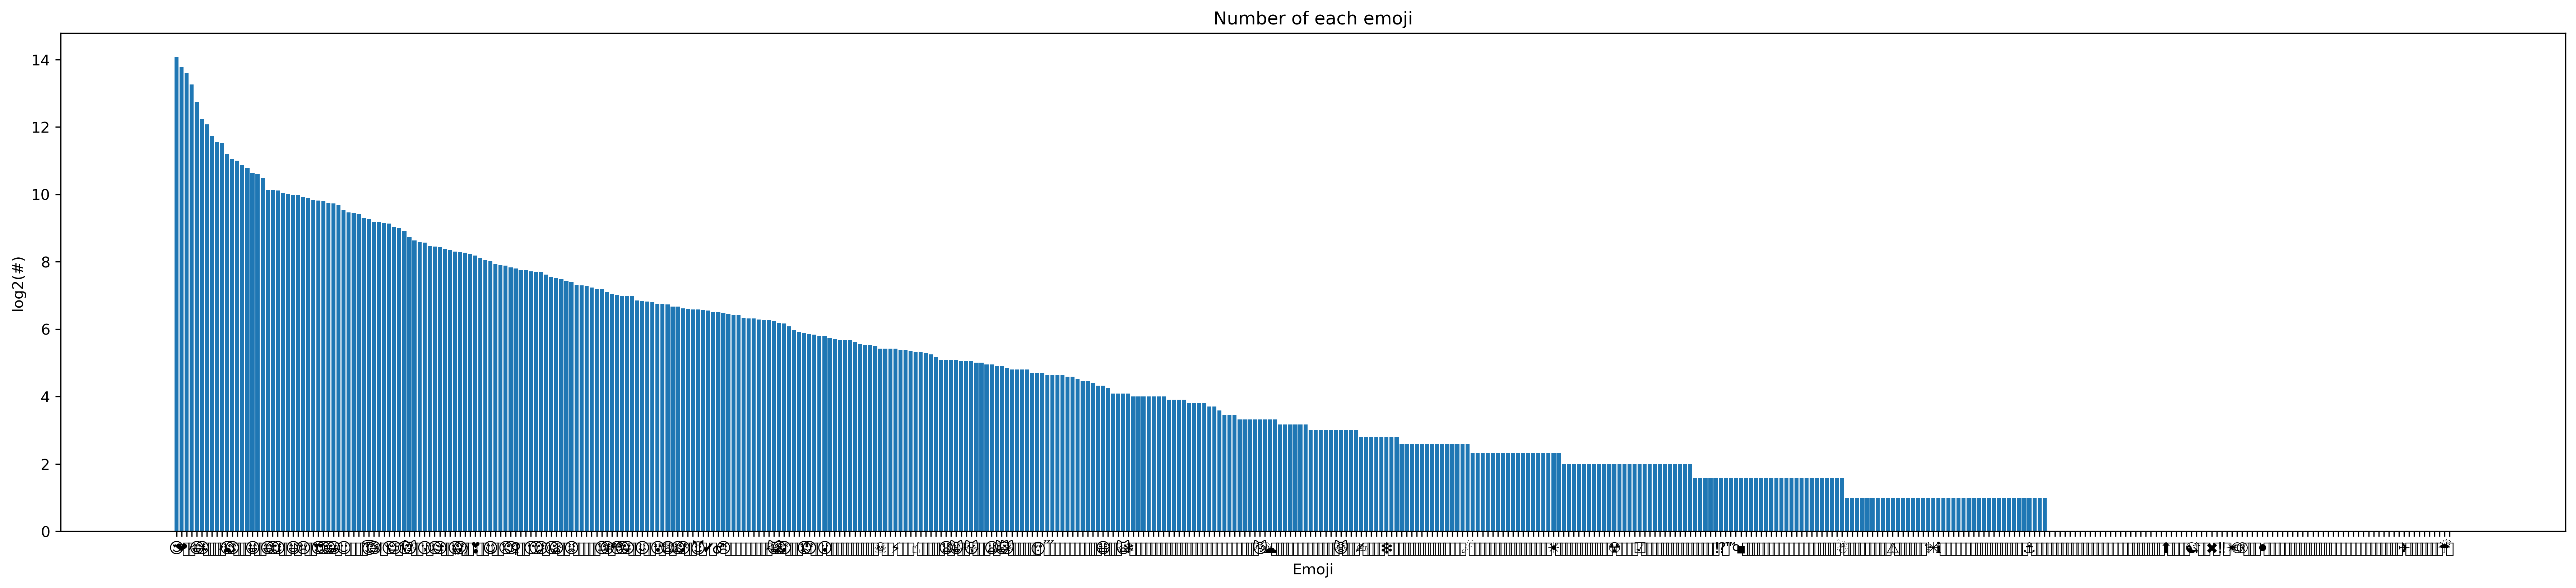

In [133]:
data_to_show = get_gt_value(emoji_dict, 0)

figure(figsize=(30, 6), dpi=300)

plt.bar(range(len(data_to_show)), np.log2(list(data_to_show.values())), align='center')
plt.xticks(range(len(data_to_show)), list(data_to_show.keys()))
plt.xlabel("Emoji")
plt.ylabel("log2(#)")
plt.title("Number of each emoji")
plt.show()

<h2 style='direction:rtl;font-family: "B Lotus";'>§ نرمال‌سازی</h2>

<div style='direction:rtl;font-family: "B Lotus";'>یک کلاس مجزا تعریف شده است که از کلاس <code>Normalizer</code> کتابخانه <code>hazm</code> ارث بری می&zwnj;کند. در این کلاس توابع زیر اضافه شده&zwnj;اند:</div>
<ul style='direction:rtl;font-family: "B Lotus";'>
  <li>تابع <code>__init__</code> صرفا به این منظور بازنویسی شده است که تابع <code>aug_data_init</code> را صدا بزند تا محتوای فایل مورد نیاز در متغیرها ذخیره شود. همچنین الفباهای مورد نیاز را مقدار دهی می کند.</li>
  <li>تابع <code>aug_data_init</code> فایلی را می&zwnj;خواند و در یک دیکشنری ذخیره می&zwnj;کند. این فایل غلط های متداولی که در متن وجود داشته است را در خود دارد و شکل صحیح آن را نوشته است و دیکشنری ساخته شده برهمین اساس می&zwnj;باشد.</li>
    <li>تابع <code>add_space_between_emoji_and_text</code> به منظور ایجاد فاصله میان متن و ایموجی‌ها می‌باشد.</li>
    <li>تابع <code>convert_to_basic_emoji</code> برخی از ایموجی‌ها که رنگ‌های مخلتف یا ساختارهای مختلف مبتنی بر یک پایه هستند را به حالت پایه تبدیل می‌کند</li>
    <li>تابع <code>normalize_emoji_len</code> تعداد ایموجی‌های موجود در متن را شمارش کرده و درصورتی که اختلاف تعداد آن‌ها با تعداد کاراکتر‌های غیر ایموجی متن بیش از <code>threshold</code> مشخصی باشد، از آن <code>threshold</code> به بعد، اجازه درج ایموجی را نمی‌دهد.</li>
    <li>تابع <code>replace_with_persian</code> برخی از کاراکترهایی که مشابه فارسی هستند ولی در الفبای فارسی نیستند را به مشابه فارسی آن‌ها تبدیل می‌کند.</li>
    <li>تابع <code>my_normalizer</code> ابتدا خود تابع <code>normalize</code> مربوط به کتابخانه <code>hazm</code> را صدا می کند و خروجی آن را گرفته و تغییرات لازم را متناسب با دیکشنری ای که توسط تابع <code>aug_data_init</code> مقدار دهی شده است را اعمال می&zwnj;کند تا این خطاها نیز رفع شود.</li>
</ul>

In [15]:
class MyNormalizer(hazm.Normalizer):
    
    def __init__(self, persian_alphabet, english_alphabet, decorative_signs, 
                 persian_numbers, english_numbers, emoji_alphabet):
        super().__init__()
        self.aug_data_init()
        self.persian_alphabet = persian_alphabet
        self.decorative_signs = decorative_signs
        self.english_alphabet = english_alphabet
        self.persian_numbers = persian_numbers
        self.english_numbers = english_numbers
        self.emoji_alphabet = emoji_alphabet
        
    def aug_data_init(self):
        f = open('./../data/augmented_data.txt', 'r')
        self.aug_data = f.readlines()
        f.close()
    
    def add_space_between_emoji_and_text(self, sent):
        res_sent = ''
        for i in range(len(sent)):
            if i+1 < len(sent):
                if (sent[i] in self.emoji_alphabet and sent[i+1] != ' ') or \
                    (sent[i] != ' ' and sent[i+1] in self.emoji_alphabet):
                    res_sent += sent[i] + ' '
                else:
                    res_sent += sent[i]
            else:
                res_sent += sent[i]
        return res_sent
    
    
    def convert_to_basic_emoji(self, sent):
        res_sent = ''
        for c in sent:
            if c in self.persian_alphabet or \
            c in self.decorative_signs or \
            c in self.english_alphabet or \
            c in self.persian_numbers or \
            c in self.english_numbers or \
            c in self.emoji_alphabet :
                res_sent += c
        return res_sent

    
    def normalize_emoji_len(self, text, threshold=300):
        emoji_num = 0
        persian_num = 0
        for t in text:
            if t not in self.persian_alphabet:
                emoji_num += 1
            elif t in self.persian_alphabet:
                persian_num += 1
        res_text = ''
        if emoji_num > persian_num + threshold:
            j = 0
            for i, t in enumerate(text):
                if t not in self.persian_alphabet:
                    j += 1
                if (j < persian_num + threshold and t in self.persian_alphabet) or (not (t in self.persian_alphabet)):
                    res_text += t
                
        else:
            res_text = text
        
        return res_text
    
    
    def replace_with_persian(self, sent):
        replace_list = {'ى':'ی',
                        'ة':'ه',
                        'ي':'ی'}
        
        for x in replace_list:
            sent = sent.replace(x, replace_list[x])
        
        return sent
    
    
    def my_normalizer(self, text):
        text = self.replace_with_persian(text)
        text = self.add_space_between_emoji_and_text(text)
        text = self.normalize_emoji_len(text)
        text = self.normalize(text)
        text = self.convert_to_basic_emoji(text)
        
        
        aug = {y[0]:y[1] for y in [x.replace('\n', '').split('\t') for x in self.aug_data]}

        for k in aug:
            while k in text:
                text = text.replace(k, aug[k])
        return text

In [16]:
normalizer = MyNormalizer(persian_alphabet, 
                          english_alphabet, 
                          decorative_signs, 
                          persian_numbers, 
                          english_numbers, 
                          emoji_alphabet
                          )

In [17]:
test_set = ["واقعااااا", "عاااالییییی", "عالیهههه", 'خداروششششکر', 'دم سازندش گرم😊', 'وانیامم🥳🥳👏', 'فوق العاده']
for i, t in enumerate(test_set):
    print(f'{i+1}\tBefore: {t}\t\tAfter: {normalizer.my_normalizer(t)}')

1	Before: واقعااااا		After: واقعا
2	Before: عاااالییییی		After: عالی
3	Before: عالیهههه		After: عالیه
4	Before: خداروششششکر		After: خداروشکر
5	Before: دم سازندش گرم😊		After: دم سازندش گرم 😊
6	Before: وانیامم🥳🥳👏		After: وانیامم 🥳 🥳 👏
7	Before: فوق العاده		After: فوق العاده


<div style='direction:rtl;font-family: "B Lotus";'>پیش پردازش اولیه متن:</div>
<ul style='direction:rtl;font-family: "B Lotus";'>
  <li>حذف <code>n\</code> ها</li>
  <li>حذف <code>space</code> های اضافه ابتدا و انتهای متن</li>
  <li>شکستن متن از نقاط دارای <code>space</code></li>
  <li>فقط کامنت‌های انتخاب می‌شوند که حتما متن فارسی نیز داشته باشند</li>
</ul>  

In [18]:
comments = []
for comment in tqdm(comments_with_emoji):
    for c in persian_alphabet:
        if c in comment:
            comments.append(comment.replace("&#039;", "\'").replace('\n', '').strip().split())
            break

print(f"Comments number: {len(comments)}")

100%|█████████████████████████████████████████████████████████████████████████| 87483/87483 [00:00<00:00, 739100.82it/s]

Comments number: 83144


In [19]:
for x in random.sample(comments, 30):
    print(' '.join(x))

عالی‌‌بود‌‌❤ترسناک‌هم‌‌نبود‌‌شاید‌‌برای‌بچه‌های‌کوچیک‌‌تر‌‌یکم‌‌ترسناک‌باشه
عالیه👏👏
عالییییییییییییییییه حتماًببینین😘😘😘😘😅
عالیییییییی بود عاشقشم 😏😏😏😏
برای دومین بار دیدم ، درد مشترک ۹۰% ماها نگاه کنید ، پشیمون نمیشید 👍
عالی👍👍👍👍
عالیه 😘❣
این فیلم بهترین فیلمی بود که تاحالا تو زندگیم دیدم ❤️❤️❤️❤️❤️💓💓💓💓💓💓مخصوصاً بازی سحر قریشی حرف نداشت معرکه بود 💕💗💜💖💞💟💝💙💚❤️💓❣️😍
عالی و درجه ۱ بازی ساعد سهیلی و هادی حجازی فر عالی بود 💚
ععععااااااللللیییی👍👍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍😍
مرسی،فیلیمو😉
عالی بود به عشق اس اس💙
عالی عالی👍👍👍👍👍👍👍👍👍
خیلی قشنگ بود😘
بسیار عالی امیر حسین😚😚
واقعا نمیدونم چی بگم عالیییییییی بود 😘
عالی ❤
رقص آقای لولایی😂😂
بسیارررررر عالی بود و لذت بردم بعد از مدتها از دیدن فیلم‌👌🏻👌🏻👌🏻👌🏻👌🏻👌🏻👍🏻👍🏻👍🏻👍🏻👍🏻👍🏻
عالی این فیلم👍💙
خیلی قشنگ بود واقعا 👏👏👏
عالی بود 👏🏻👏🏻
خیلی گریه کردم وحشتناک نبود غم انگیز بود 😔😔😔
خوب بود ممنون❤
♥️♥️♥️♥️♥️♥️♥️♥️دسته فيلمودردنكنه پيشنهادميدم كه نگاه كنين بنزرمن خيلى سامورايى خوب بازيكردلطفابريدنگاه كنيد😜😜😜😜😜😜😜😜😜
این سری فقط تو پیشنهاد دادن چالش خیلی خیلی خوب بودن 😄
فوق العا

<div style='direction:rtl;font-family: "B Lotus";'>نرمال‌سازی به کمک تابع <code>my_normalizer</code> انجام می شود که شامل بخش‌های زیر می‌باشد:</div>
<ul style='direction:rtl;font-family: "B Lotus";'>
  <li>اجرای تابع <code>normalizer</code> کتابخانه <code>hazm</code></li>
  <li>با استفاده از تابع <code>add_space_between_emoji_and_text</code> در مواردی که بین متن و ایموجی فاصله‌ای وجود ندارد، فاصله ایجاد می کند.</li>
    <li>با استفاده از تابع <code>normalize_emoji_len</code> تعداد ایموجی‌های موجود در متن نرمالایز می‌شود.</li>
  <li>بعضی از اشتباهات یا حالت‌هایی که در متن به صورت محاوره‌ای استفاده می‌شود، اصلاح می‌شود.</li>
</ul>  

In [20]:
comments_normalized = [[normalizer.my_normalizer(y) for y in x] for x in tqdm(comments)]

100%|███████████████████████████████████████████████████████████████████████████| 83144/83144 [00:33<00:00, 2484.85it/s]


In [21]:
for x in random.sample(comments_normalized, 30):
    print(' '.join(x))

خیلی خوبه 😘 😘 😘
عالی عالی عالی هرچی بگم بازم کمه 👍 👍 😍 😍
خیلی خنده دار بود 😂 😂
سلام به همه بسیار بسیار عالی بود ممنون ❤ ❤
خیلی قشنگه من خیلی این کارتون و دوست داشتم 😍 😍 😍 😍 👍 👍 👍 👍 😍 😍 😍 😍 👍 👍 👍 👍 حتما ببینید
عالی ❣ 💝 💕 💞
خیلی خوب بود 😍 🥺
خیلی خنده دار بود 😂 😂 😂
خیلی دوست داشتنی بود 😍 ممنونم فیلیمو
بهترین فیلم دنیا 😙 😙 😙 😙 😙
به کمتر فیلمی امتیاز کامل میدم که شامل این فیلم شد 👌 👌 👌 👌 در ضمن منم مکانیک هستمالبته مهندس مکانیک 😅
عالی ❤ ❤ ❤
فوق‌العاده بود 😂 ❤ ❤ ❤ پیشنهاد میکنم حتما ببینید 😻 ❤ ❤ ❤
خیلی غم انگیزه میمیره 😭 😭 😭 😭 😭 😭 😭 😥 😥 😥 😥 😪 😪 😪 😪 😪 😪
عالیه من حدود ۳۰ بار دیدمش 😍 😍 😍 😍
خیلی قشنگه 😢 😢 😢 😢 🥺 🥺 🥺 💓 💓 💓 ❤ ❤ 👌 👌
عالی بود 💚 💫
لذت بردم از دیدنش وتوصیه میکنم حتما ببینین 👍 👍
. م. بابایی فوق العاده زیبا و دیدنی 👍 👍 👍 👍 👍 👍 👍
عالی بود من خیلی دوستش داشتم انقدر دوست دارم کار های دکتر استرینج انجام بدم و حمینتور تیپش 😎 😎 😎 😎 😎 😎 😎 😎 😎 😏 😏 😏
آخیی خیلی فیلم نازی بود 🥲 ❤ 
من خیلی ساخت ایران دوست دارم 🥰 😍 😍 ❤ 
عالی نبود 😂 😂 😂
وای جواد عزتی چه خوش تیپ و جذابچه گریم متفاوتی 👌 👌 👌 😍 😍 😍 
خیلی 

<h2 style='direction:rtl;font-family: "B Lotus";'>§ جمله‌بندی</h2>

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">در این بخش کامنت ها را به جملات تشکیل دهنده می‌شکنی؛ این کار به کمک تابع <code>sent_tokenize</code> کتابخانه <code>hazm</code> انجام شده است.</div>

In [22]:
comments_sentences = [hazm.sent_tokenize(' '.join(x)) for x in tqdm(comments_normalized)]

100%|█████████████████████████████████████████████████████████████████████████| 83144/83144 [00:00<00:00, 350401.58it/s]


In [23]:
for x in random.sample(comments_sentences, 50):
    print(' ### '.join(x))

عاشقش شدم 😍 عالی بود این فیلم عالی
فیلم قشنگی بود 😊 😊
عالئیی 😍 😘
عالی ❤ ولی غمگین 😥 کاش صحرا به حرف‌های مهشید گوش بده و از انتقام دست بکشه 🙂
کی میاد 😍 کسی می دونه بگه
جواد عزتی عالی بود عالی ❤
این فیلم عالیه۱۰۰۰۰۰۰۰۰ باردیدمش سلطان جواد عزتی عالیه 🤩 😂
بدون شک میترکونه 😍 🧡
عالی بود حتما ببینید 👍
خیلی خوب بود کاش فصل ۲هم ساخته بشه ❤ ممنون از فیلیمو
اسلیهان کامانساهین در سریال ستاره شمالی خیلی قشنگ بازی کرد . ### 🥰
عالی عالی عالی 👏 👏 👏
فوق العاده هیجان انگیز 👌 👌 👌
بسیار فیلم قشنگی بود ❤ ❤ ❤
عالی بود 😔 😔 😔 😔
عالیه ولی حیف کوتاه ، کاش یکم طولانی تر بود ❤  😍
خیلی خیلی خیلی خیلی خیلی خیلی فیلم عالی بود خیلی دوسش داشتم نکاش کنین عالی بود 🥰 🥰 👌  👌  👌  👌  👌  👌  👌  👌  👌  👌  👌  👌  👌  👌  👌  👌  👌  👌  👌  👌  👌
یعنی نقش جواد عزتی عالیه 👍
امیر مقاره و بسسس ❤ ⭐ 💙
عالی بود 😍
عالی 💝
خیلی آموزنده بود ❤
اصلا ربطی به قسمت اولش نداشت، وپراز صحنهای خشن و بدون هیچ پیامی، پیرمرد قسمت اول ادم بد نشون داده شد و قسمت دوم ادم خوب 👎
عالی و جذاب و حرفه ایی ❤ ❤ ❤ 👏 👏 👏
روحت شاد قهرمان ❤
😰 😰 😰 😰 خیلی تزسناک بود نه اصلا ت

<h2 style='direction:rtl;font-family: "B Lotus";'>§ توکنیزیشن</h2>

<div style="direction:rtl; font-family:'B Lotus'; font-size:120%">تابع <code>replace_shift_space_with_space</code> ابتدا با استفاده از <code>replace_space_with_shift_space</code> نیم‌فاصله‌ها را به فاصله تبدیل می‌کند، سپس با استفاده از تابع <code>word_tokenize</code> که مربوط به کتابخانه <code>hazm</code> است. سپس فاصله‌ها را در بعضی از لغات اصلاح می‌کند و به نیم‌فاصله تبدیل می‌کند.</div>

In [24]:
def replace_shift_space_with_space(sent):
    while '\u200c' in sent:
        sent = sent.replace('\u200c', ' ')
    return sent

def replace_space_with_shift_space(tokens):
    res_token = []
    n_gram = {'فوق‌العاده': ['فوق', 'العاده'],
              'غم‌انگیز': ['غم', 'انگیز'],
              'هیجان‌انگیز': ['هیجان', 'انگیز']}
    i = 0
    while i < len(tokens)-1:
        for aug in n_gram:
            if tokens[i] == n_gram[aug][0] and tokens[i+1] == n_gram[aug][1]:
                res_token.append(aug)
                i += 2
            else:
                res_token.append(tokens[i])
                i += 1
            if i >= len(tokens)-1:
                break
    return res_token


def my_word_tokenize(sent):
    sent = replace_shift_space_with_space(sent)
    tokens = hazm.word_tokenize(sent)
    tokens = replace_space_with_shift_space(tokens)
    return tokens

In [25]:
comments_tokens = [[my_word_tokenize(sent) for sent in sents] for sents in tqdm(comments_sentences)]
tokens = []
for t in comments_tokens:
    while [] in t:
        t.remove([])
    tokens.append(t)
comments_tokens = tokens

100%|██████████████████████████████████████████████████████████████████████████| 83144/83144 [00:00<00:00, 99616.71it/s]


In [26]:
for x in random.sample(comments_tokens, 50):
    print(x)

[['خیلی', 'خوب', 'بود', '👍', '👌', '❤', '💜', '🧡', '💛', '💚', '💙', '🤎', '🤍']]
[['من', 'یخی', 'رو', 'دوست', 'دارم', 'هرکی', 'دوسش', 'داره', 'بلایکه']]
[['وایی', 'وایی', 'هرچقدر', 'بگم', 'عالی', 'بود', 'کم', 'گفتم', 'ببینید', 'و', 'لذت', 'ببرید', 'فقط', '❤', '❤']]
[['چمچاره', 'بینظیر', 'بود', '🤣', '🤣', '🤣']]
[['مرسی', 'که', 'این', 'فیلم', 'خوب', 'وگذاشتید', '🙏', '🙏', '🙏', '🙏']]
[['من', '۱۰۰', 'باره', 'دارم', 'نگاش', 'میکنم', 'خیلی', 'خوبه', 'مخصوصا', 'جای', 'که', 'استوار', 'آهنگ', 'میخونه', '😅', '😅']]
[['عالی', '😍', '😍', '😍', '😍', '😍', '😍', '❤', '❤', '❤', '❤', '❤']]
[['عالی']]
[['بلاخره', 'اومد', '🤩']]
[['قشنگ', 'بود', 'دوست', 'داشتم', '❤', '❤', '❤', '❤']]
[['خیلی', 'فیلم', 'قشنگی', 'بود', '💞']]
[['معرکه', 'بود', '👏']]
[['خدا', 'خیلی', 'قشنگه', '🤩']]
[['یا', 'حضرت', 'زهرا', '😬', '😬']]
[['فوق\u200cالعاده', 'حرفه', 'ای', '👍', '👍', '👍']]
[['نمیدونم', 'چی', 'بگم', 'واقعا', 'عالیه', 'ببینیدش', '❤', '❤', '❤', '❤', '❤', '😉', '😉', '😉']]
[['خیلی', 'عالی', 'بود', 'دست', 'آقا', 'ی', 'پژمان', 'جمشیدی',

In [273]:
# f = open('./../result/sam.txt', 'w')
# for x in random.sample(comments_tokens, 700):
#     f.write(f"{'--'.join(x[0])}\n")
# f.close()

<h2 style='direction:rtl;font-family: "B Lotus";'>§ تحیلی بسامد</h2>

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">در این قسمت به بررسی کلمات پرتکرار متن می‌پردازیم تا بتوانیم شناخت بهتری از کسب کنیم.</div>

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">در بخش اول تمامی توکن‌ها (کلمات) را بررس می‌کنیم تا وضعیت کلی از کلمات پرتکرار به دست اید.</div>

In [27]:
tokens = list(itertools.chain(*itertools.chain(*comments_tokens)))

In [28]:
data = FreqDist(tokens).most_common(60)

freq_analysis = pd.DataFrame(data, columns=['token', 'freq'])  
freq_analysis

,token,freq
0,عالی,41529
1,بود,41174
2,😍,38767
3,❤,35318
4,خیلی,28618
5,👌,20068
6,👍,19388
7,و,14548
8,😂,13769
9,فیلم,13604


<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">یک تحلیل کلی از تعداد کلمات، تعداد کلمات یکتا، میانگین طول کلمات و بزرگترین کلمه موجود در متن</div>

In [29]:
print ('%-16s' % 'Number of words', '%-16s' % len(tokens))
print ('%-16s' % 'Number of unique words', '%-16s' % len(set(tokens)))
avg=np.sum([len(word) for word in tokens])/len(tokens)
print ('%-16s' % 'Average word length', '%-16s' % avg)
print ('%-16s' % 'Longest word', '%-16s' % tokens[np.argmax([len(word) for word in tokens])])

Number of words  848470          
Number of unique words 21147           
Average word length 2.9681956934246347
Longest word     ۱۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰۰


<h2 style='direction:rtl;font-family: "B Lotus";'> § حذف stop-word  </h2> 

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">در این بخش تلاش می‌کنیم با حذف stop-words کلماتی که مفهومی در کانتکس ما دارند و پرتکرار هستند را شناسایی کنیم؛ برای این منظور سه حالت مختلف را بررسی می‌کنیم (فایل <code>stopwords.txt</code> شامل کلماتی می‌باشد که به عنوان stop-words در نظر گرفته شده است، در انتهای آن موارد متناسب با متن کامنت ها نیز اضافه شده است.):</div>
<ul style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">
    <li>بررسی بسامد در حالتی که فقط کلمات فارسی stop-word حذف شده اند (حالت <code>nonstop</code> در جدول)</li>
    <li>بررسی بسامد در حالتی که فقط ایموجی‌های متن حذف شده اند (حالت <code>nonemoji</code> در جدول)</li>
    <li>بررسی بسامد در حالتی که هم ایموجی‌ها و هم stop-words فارسی حذف شده اند (حالت <code>nonstop_nonemoji</code> در جدول)</li>
</ul>

In [30]:
stopwords = [normalizer.normalize(x.strip()) for x in codecs.open('./../data/stopwords.txt','r','utf-8').readlines()]
stopwords_withemoji = stopwords.copy()
stopwords_withemoji.extend(emoji_alphabet)

In [33]:
tokens_nonstop = [t for t in tqdm(tokens) if t not in stopwords]
tokens_nonemoji = [t for t in tqdm(tokens) if t not in emoji_alphabet]
tokens_nonstop_nonemoji = [t for t in tqdm(tokens) if t not in stopwords_withemoji]

data_nonstop = {}
num = 60
data_nonstop['nonstop'] = FreqDist(tokens_nonstop).most_common(num)
data_nonstop['nonemoji'] = FreqDist(tokens_nonemoji).most_common(num)
data_nonstop['nonstop_nonemoji'] = FreqDist(tokens_nonstop_nonemoji).most_common(num)

freq_analysis = pd.DataFrame(data_nonstop)
freq_analysis

100%|███████████████████████████████████████████████████████████████████████| 848470/848470 [00:03<00:00, 261741.04it/s]


,nonstop,nonemoji,nonstop_nonemoji
0,"(😍, 38767)","(عالی, 41529)","(قشنگ, 6145)"
1,"(❤, 35318)","(بود, 41174)","(واقعا, 5873)"
2,"(👌, 20068)","(خیلی, 28618)","(عالیه, 3954)"
3,"(👍, 19388)","(و, 14548)","(حتما, 3751)"
4,"(😂, 13769)","(فیلم, 13604)","(دیدم, 2877)"
5,"(😘, 13192)","(این, 9800)","(ممنون, 2462)"
6,"(👏, 10039)","(که, 9034)","(زیبا, 2237)"
7,"(🤣, 7694)","(از, 8545)","(دوست, 2232)"
8,"(🤩, 7325)","(من, 8393)","(خنده, 2183)"
9,"(قشنگ, 6145)","(خوب, 6531)","(بازی, 1927)"


<h2 style='direction:rtl;font-family: "B Lotus";'> § ابرواژه کلمات  </h2> 

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">با استفاده از کتابخانه <code>WordCloudFa</code> که شخصی سازی شده برای زبان فارسی می باشد هر سه حالت بالا را به شکل ابرواژه بررسی می کنیم:</div>
<em>
    <div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">(این کتابخانه به صورت پیش‌فرض بعضی از stop-words را حذف می کند)</div>
</em>


In [220]:
text = ' '.join(tokens_nonstop)
wordcloud = WordCloudFa(persian_normalize=False, width=1500, height=1000)
wc = wordcloud.generate(text)
image = wc.to_image()
# image.show()
image.save('./../result/tokens_nonstop_wordcloud.png')

In [221]:
text = ' '.join(tokens_nonemoji)
wordcloud = WordCloudFa(persian_normalize=False, width=1500, height=1000)
wc = wordcloud.generate(text)
image = wc.to_image()
# image.show()
image.save('./../result/tokens_nonemoji_wordcloud.png')

In [222]:
text = ' '.join(tokens_nonstop_nonemoji)
wordcloud = WordCloudFa(persian_normalize=False, width=1500, height=1000)
wc = wordcloud.generate(text)
image = wc.to_image()
# image.show()
image.save('./../result/tokens_nonstop_nonemoji_wordcloud.png')

<div style="content: '';clear: both; display: table;">
    <div style="float: left; width: 33.33%; padding: 5px;">
        <center>tokens_nonstop_wordcloud</center>
        <img src="./../result/tokens_nonstop_wordcloud.png" alt="tokens_nonstop_wordcloud" style="width:100%">
    </div>
    <div style="float: left; width: 33.33%; padding: 5px;">
        <center>tokens_nonemoji_wordcloud</center>
        <img src="./../result/tokens_nonemoji_wordcloud.png" alt="tokens_nonstop_wordcloud" style="width:100%">
    </div>
    <div style="float: left; width: 33.33%; padding: 5px;">
        <center>tokens_nonstop_nonemoji_wordcloud</center>
        <img src="./../result/tokens_nonstop_nonemoji_wordcloud.png" alt="tokens_nonstop_wordcloud" style="width:100%">
    </div>
</div>

<h2 style='direction:rtl;'> § استفاده از lemmatization, stemming  </h2> 

In [34]:
stemmer = hazm.Stemmer()
lemmatizer = hazm.Lemmatizer()

def get_lemma_set(tok, opt=1):
    if opt ==1:
        return stemmer.stem(tok)
    if opt ==2:
        return lemmatizer.lemmatize(tok)

<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">فرآیند استخراج ریشه کلمات (lemmatization):</div>

In [35]:
opt = 2
num = 60

tokens_nonstop_lemstem = [get_lemma_set(t, opt) for t in tqdm(tokens_nonstop)]
tokens_nonemoji_lemstem = [get_lemma_set(t, opt) for t in tqdm(tokens_nonemoji)]
tokens_nonstop_nonemoji_lemstem = [get_lemma_set(t, opt) for t in tqdm(tokens_nonstop_nonemoji)]

dataframe_nonstop_lemstem = {}

dataframe_nonstop_lemstem['nonstop'] = FreqDist(tokens_nonstop_lemstem).most_common(num)
dataframe_nonstop_lemstem['nonemoji'] = FreqDist(tokens_nonemoji_lemstem).most_common(num)
dataframe_nonstop_lemstem['nonstop_nonemoji'] = FreqDist(tokens_nonstop_nonemoji_lemstem).most_common(num)

freq_analysis_nonstop_lemstem = pd.DataFrame(dataframe_nonstop_lemstem)   
freq_analysis_nonstop_lemstem

100%|██████████████████████████████████████████████████████████████████████| 268296/268296 [00:00<00:00, 1178267.51it/s]


,nonstop,nonemoji,nonstop_nonemoji
0,"(😍, 38767)","(بود#باش, 43451)","(قشنگ, 7151)"
1,"(❤, 35318)","(عالی, 41530)","(واقعا, 5873)"
2,"(👌, 20068)","(خیلی, 28618)","(دید#بین, 4368)"
3,"(👍, 19388)","(فیلم, 15800)","(عالیه, 3954)"
4,"(😂, 13769)","(و, 14566)","(حتما, 3751)"
5,"(😘, 13192)","(این, 9895)","(ممنون, 3118)"
6,"(👏, 10039)","(که, 9034)","(دوست, 2512)"
7,"(🤣, 7694)","(از, 8747)","(زیبا, 2354)"
8,"(🤩, 7325)","(من, 8650)","(عاشق, 2307)"
9,"(قشنگ, 7151)","(قشنگ, 7151)","(خنده, 2183)"


<div style="direction:rtl; font-family: 'B Lotus'; font-size:115%;">فرآیند تقلیل فرم کلمات (stemming):</div>

In [36]:
opt = 1
num = 60

tokens_nonstop_lemstem = [get_lemma_set(t, opt) for t in tqdm(tokens_nonstop)]
tokens_nonemoji_lemstem = [get_lemma_set(t, opt) for t in tqdm(tokens_nonemoji)]
tokens_nonstop_nonemoji_lemstem = [get_lemma_set(t, opt) for t in tqdm(tokens_nonstop_nonemoji)]

dataframe_nonstop_lemstem = {}

dataframe_nonstop_lemstem['nonstop'] = FreqDist(tokens_nonstop_lemstem).most_common(num)
dataframe_nonstop_lemstem['nonemoji'] = FreqDist(tokens_nonemoji_lemstem).most_common(num)
dataframe_nonstop_lemstem['nonstop_nonemoji'] = FreqDist(tokens_nonstop_nonemoji_lemstem).most_common(num)

freq_analysis_nonstop_lemstem = pd.DataFrame(dataframe_nonstop_lemstem)   
freq_analysis_nonstop_lemstem

100%|███████████████████████████████████████████████████████████████████████| 268296/268296 [00:00<00:00, 904115.09it/s]


,nonstop,nonemoji,nonstop_nonemoji
0,"(😍, 38767)","(بود, 41680)","(قشنگ, 7151)"
1,"(❤, 35318)","(عال, 41626)","(واقعا, 5873)"
2,"(👌, 20068)","(خیل, 28662)","(عالیه, 3954)"
3,"(👍, 19388)","(و, 14591)","(حتما, 3751)"
4,"(😂, 13769)","(فیل, 13663)","(دید, 3133)"
5,"(😘, 13192)","(این, 9896)","(ممنون, 3118)"
6,"(👏, 10039)","(به, 9091)","(دوس, 3018)"
7,"(🤣, 7694)","(که, 9034)","(زیبا, 2658)"
8,"(🤩, 7325)","(از, 8787)","(باز, 2421)"
9,"(قشنگ, 7151)","(من, 8675)","(وا, 2353)"


<h2 style='direction:rtl;'> § استفاده از POS-tags  </h2> 

In [37]:
pos_tagger = hazm.POSTagger(model='./../resources/postagger.model')

In [38]:
dataframe_nonstop_lemstem_advjj = {}
POS_TAGs = ['NUM', 'N', 'V', 'AJ', 'ADV', 'PUNC']
for tag in POS_TAGs:
    selected = []
    for x,y in FreqDist(tokens_nonstop_lemstem).most_common(3000):
        pos = pos_tagger.tag([x])[0][1]
        if pos in [tag]:
            selected.append((x,y))
    dataframe_nonstop_lemstem_advjj[tag] = copy.deepcopy(selected[0:60])

dataframe_nonstop_lemstem_advjj = pd.DataFrame(dataframe_nonstop_lemstem_advjj)
dataframe_nonstop_lemstem_advjj

,NUM,N,V,AJ,ADV,PUNC
0,"(🥰, 4863)","(😂, 13769)","(خوبه, 1716)","(قشنگ, 7151)","(واقعا, 5873)","(😍, 38767)"
1,"(آخر, 1186)","(🤩, 7325)","(قشنگه, 1177)","(ممنون, 3118)","(حتما, 3751)","(❤, 35318)"
2,"(🥳, 539)","(😭, 5478)","(ببین, 866)","(زیبا, 2658)","(باز, 2421)","(👌, 20068)"
3,"(🌈, 356)","(عالیه, 3954)","(نداره, 664)","(جالب, 1319)","(فوق‌العاده, 1858)","(👍, 19388)"
4,"(یک, 329)","(دید, 3133)","(خندید, 611)","(ترسناک, 1303)","(مخصوصا, 1215)","(😘, 13192)"
5,"(۲, 272)","(دوس, 3018)","(بود, 506)","(بد, 1099)","(اصلا, 823)","(👏, 10039)"
6,"(هزار, 232)","(وا, 2353)","(میاد, 493)","(جذاب, 1080)","(چقدر, 821)","(🤣, 7694)"
7,"(۱۰, 226)","(عاشق, 2307)","(هست, 400)","(شاد, 551)","(لطفا, 675)","(💖, 3839)"
8,"(اول, 219)","(😁, 2220)","(بیاد, 398)","(منتظر, 454)","(زود, 468)","(💜, 3589)"
9,"(🥲, 217)","(خنده, 2183)","(بشه, 375)","(امیدوار, 370)","(مگه, 313)","(💙, 3574)"


<h2 style='direction:rtl;'> § دیدن سیاق</h2> 

In [39]:
comment_text = nltk.Text(tokens_nonstop_lemstem)
comment_text.concordance('فیلم')

Displaying 25 of 25 matches:
وامل 🙏 🙏 باز درخ زیبا 👍 👍 حتما بهترین فیلم ایران اخر بخصوص پایان توصیه حتما 👌 👌 
وضوع حس ❤ ❤ ❤ ❤ ❤ بعداز مدت دید کا مث فیلم ساخته_شود 👍 اصلا هاد حجاز فر صحب عشق 
خورد 😅 😅 😅 زیبا 😍 😍 😍 😍 😍 😍 😍 😍 😍 😍 👍 فیلم خدا نمیتون توصیف کنم 😍 😍 😍 😍 😍 😍 😍 👌 
کارگردان مهر احمد همراه مصطف کیا عاشق فیلم واقا کار همشون 🥰 قشنگه قشنگ خو اومد ا
وس محمد امین کر پور واقا کار پسر عاشق فیلم قشنگ 👍 👍 جالب قشنگ 🥰 بانو صامت بازیگر
خنده 😂 😂 😂 😂 خوبه 😄 کا قسم بینظیر 🤩 🤩 فیلم ۱۰۰ دید اصلا تکرار نمیشه 😃 صد ببین با
ر ببین خسته نمیش 😂 ما بابا فامیل عاشق فیلم ۳۵ دیدم 😂 ( دیالوگا حفظم, 😂 نازنین بی
ترکیه 👍 👍 👍 واقعا قشنگ بود 👌 آقا عاشق فیلم ایران عاشق مخصوصا آهنگ وا 😻 😻 😻 😻 😻 😻
اکر دوس باز میکنه لایک قشنگه حتما جزو فیلم هست جذابه 🤗 سینما دید 👌 سینما دید منت
 مو فرفریه 🤣 🤣 🤣 💖 💖 💖 👌 👌 👌 👍 👍 عاشق فیلم واقعا باحالیه خنده 😂 😂 خنده اونجا دخت
 فوق‌العاده ندار 😘 😘 😘 😚 😚 😚 😍 😍 عاشق فیلم 😘 😘 😘 😘 زیباس واقعا بالا ۱۰ دیدمو سیر
❤ ❤ ❤ ❤ ❤ ❤ ❤ ❤ ❤ وا خوبه 😂 😂 😂 عالیب فیلم 😍 😍 عالیعالیوعال ❤ ❤ ❤ ❤ ❤ ❤ ❤ ❤ ❤ ❤ 

In [40]:
comment_text[0]

'۸'

<h2 style='direction:rtl;'> § چانکینگ - عبارت یابی -- عبارات منظم   </h2> 

In [41]:
for i, sent in enumerate(comments_tokens[0:10]):
    print(f'------------({i})------------')
    for t in pos_tagger.tag(sent[0]):
        print(t)

------------(0)------------
('توی', 'Pe')
('۸', 'NUM')
('ساعت', 'N')
('مهلت', 'Ne')
('فیلم', 'N')
('۲', 'NUM')
('بار', 'N')
('این', 'DET')
('فیلم', 'N')
('بی', 'P')
('نظیر', 'N')
('را', 'POSTP')
('دیدم', 'V')
('،', 'PUNC')
('واقعیت', 'Ne')
('جامعه', 'N')
('و', 'CONJ')
('واقعا', 'ADV')
('و', 'CONJ')
('به', 'P')
('شدت', 'N')
('با', 'P')
('احساساتم', 'N')
('بازی', 'N')
('شد', 'V')
('،', 'PUNC')
('حتما', 'ADV')
('پیشنهاد', 'N')
('میکنم', 'V')
------------(1)------------
('ارزش', 'N')
('دیدن', 'N')
('داره', 'V')
------------(2)------------
('پسندیدم', 'N')
------------(3)------------
('عالی', 'AJ')
('بود', 'V')
------------(4)------------
('خیلی', 'ADV')
('خوب', 'AJ')
('بود', 'V')
('👌', 'PUNC')
------------(5)------------
('خوب', 'AJ')
('بود', 'V')
('👏', 'PUNC')
------------(6)------------
('عالی', 'AJ')
('بود', 'V')
('👌', 'N')
('👌', 'V')
('👌', 'PUNC')
------------(7)------------
('عالی', 'AJ')
('بود', 'V')
('پیشنهاد', 'N')
('میکنم', 'V')
('تماشا', 'N')
('کنید', 'V')
------------(8)--------

In [42]:
def vasf_ext(sentence):
    grammar = r"""
      NVASF: {<N|Ne><AJ>}
      GHEIDV: {<ADV><V>}
    """
    cp = nltk.RegexpParser(grammar)
    return (cp.parse(sentence))

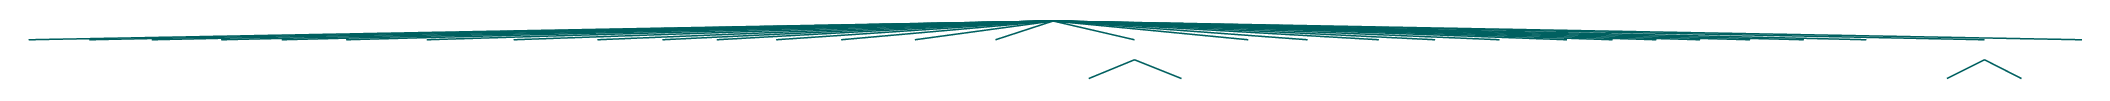

In [44]:
vasf_ext(pos_tagger.tag(comments_tokens[19][0]))

In [45]:
pos_tagger.tag(comments_tokens[19][0])

[('عالی', 'AJ'),
 ('بود', 'V'),
 ('ارزش', 'Ne'),
 ('دیدن', 'N'),
 ('داره', 'V'),
 ('و', 'CONJ'),
 ('مثل', 'ADVe'),
 ('فیلمای', 'Ne'),
 ('دیگه', 'PRO'),
 ('بی', 'P'),
 ('پایان', 'N'),
 ('نبود', 'V'),
 ('و', 'CONJ'),
 ('فوق', 'AJe'),
 ('العاده', 'AJe'),
 ('کارگردانی', 'Ne'),
 ('ماهرانه', 'AJ'),
 ('ای', 'N'),
 ('داشت', 'V'),
 ('و', 'CONJ'),
 ('با', 'P'),
 ('حقیقت', 'Ne'),
 ('ها', 'N'),
 ('رو', 'N'),
 ('به', 'P'),
 ('رو', 'N'),
 ('مان', 'N'),
 ('کرد', 'V'),
 ('و', 'CONJ'),
 ('حقیقت', 'Ne'),
 ('تلخ', 'AJ'),
 ('است', 'V')]

In [46]:
mosufs = []
gheids = []
for sentence in tqdm(comments_tokens):
    tree=vasf_ext(pos_tagger.tag(sentence[0]))
    for subtree in tree.subtrees():
        if subtree.label() == 'NVASF':
            mosufs.append(subtree.leaves())
        if subtree.label() == 'GHEIDV':
            gheids.append(subtree.leaves())            

100%|███████████████████████████████████████████████████████████████████████████| 83144/83144 [00:09<00:00, 8354.50it/s]


In [50]:
mosuf_texts = [' '.join([x[0],y[0]]) for x,y in mosufs]
gheid_texts = [' '.join([x[0],y[0]]) for x,y in gheids]
mosuf_texts[0:10], gheid_texts[0:10]

(['فیلم قشنگی',
  '👌 خسته',
  'درخشان زیبا',
  'فیلمهای ایرانی',
  'کارگردانی ماهرانه',
  'حقیقت تلخ',
  'دلم خنک',
  'آدم کثیف',
  'فیلم ایرانی',
  'نقش آفرینی'],
 ['حتما داره',
  'حتما ببینید',
  'حتما ببینید',
  'حتما بیینید',
  'فقط میتونم',
  'زود گذشتید',
  'زودتر بیاد',
  'خیلی خوبه',
  'خیلی منتظرم',
  'فقط میتونم'])

In [53]:
results = {}
results['mosuf'] = nltk.FreqDist(mosuf_texts).most_common(50)
results['gheid'] = nltk.FreqDist(gheid_texts).most_common(50)
pd.DataFrame(results)

,mosuf,gheid
0,"(فیلم عالی, 622)","(حتما ببینید, 1691)"
1,"(فیلم قشنگی, 521)","(خیلی خوبه, 891)"
2,"(فیلم خوبی, 456)","(خیلی قشنگه, 757)"
3,"(دمتون گرم, 171)","(مگه میشه, 144)"
4,"(فیلم خوب, 144)","(حتما ببینین, 144)"
5,"(فیلم قشنگ, 143)","(خیلی خندیدم, 144)"
6,"(فیلم فوق, 121)","(حالا دیدم, 131)"
7,"(هیجان انگیز, 116)","(چی بگم, 95)"
8,"(فیلم زیبا, 111)","(هرچی بگم, 85)"
9,"(باب اسفنجی, 99)","(فقط میتونم, 69)"
